### This notebook will serve as a sandbox for bespoke visualizations for the project

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helper 
import warnings
warnings.filterwarnings('ignore')

# load the data
data = pd.read_csv('../data/merged_data.csv')

data.shape

(1321, 420)

<AxesSubplot:xlabel='weeks_attended'>

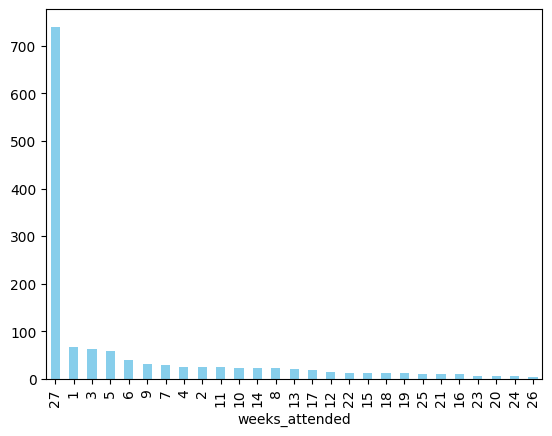

In [4]:
data.weeks_attended.value_counts().plot(kind='bar', color='skyblue')

### Build a Dataframe with Time Series for Plotting
- We will create a multi-layered plot that shows insight on patient population treatment response
- To create a multi-layered plot, we will create 3 different series, representing:
    - Total Positive Test Rates for Patient Population
    - Total Negative Test Rates for Methadone Patient Group
    - Total Negative Test Rates for Buprenorphine Patient Group
<br><br>
We will create a bar plot for the total positive test rates and line plots for the negative test rates for each patient group<br>

In [ ]:
# create the test dataframe, use list comprehension to call all columns that start with 'test_Opiate300'
# then add the medication column at the end to filter the data
tests = data[[col for col in data.columns if col.startswith('test_Opiate300')]+['medication']]

# remove the column names to create a test matrix with numbers for columns
tests.columns = tests.columns.str.replace('test_Opiate300_', '')

# there is a value -5 which indicates test results unclear
# count how many times -5 occurs in tests and compare to dataset
tests[tests == -5].count().sum()/tests.size

# the total accounts for .005 of the data, so we can update these to 0
# better not to skew the positive test data as the % of -5 is so low
for col in tests.columns:
    tests[col] = tests[col].replace(-5, 0)

# create methadone test group
methadone = tests[tests['medication'] == 1.0]

# slice off the final column, aggregate cols with sum 
# transform to dataframe and rename column to patient group
methadone = methadone.iloc[:, :-1].sum().to_frame('methadone_group')

# create buprenorphine test group
buprenorphine = tests[tests['medication'] == 2.0]

# slice off the final column, aggregate cols with sum 
# transform to series and rename column to patient group
buprenorphine = buprenorphine.iloc[:, :-1].sum().to_frame('buprenorphine_group')

# merge series
test_results = pd.concat([methadone, buprenorphine], axis=1)

# create total column, sum of both test groups
test_results['total'] = (test_results['methadone_group'] + test_results['buprenorphine_group'])

test_results

In [ ]:
# Adjusted code to ensure colors show up in the legend

# set figure size and axis
fig, ax = plt.subplots(figsize=(14, 4))
# plot count of total tests between patient groups as barplot
sns.barplot(x=test_results.index, y=test_results.total, color='darkgray', ax=ax)

# Use ax.plot for consistency with seaborn's ax
# layer in line plots for methadone and buprenorphine patient groups
ax.plot(np.array(methadone.index), np.array(methadone.methadone_group), marker='_', color='blue', linewidth=2.5, label='Methadone')
ax.plot(np.array(buprenorphine.index), np.array(buprenorphine.buprenorphine_group), marker='_', color='red', linewidth=2.5, label='Buprenorphine')

# Create legend to the right, outside of the plot, using ax.legend for consistency
ax.legend(loc='upper right')

# Set the title and labels
ax.set_title('Number of Positive Opiate Tests by Treatment Group')
ax.set_xlabel('Week of Treatment')
ax.set_ylabel('Number of Positive Opiate Tests');